This code deletes objects that are no longer needed in order to solve memory problem and run BERT on all data

In [ ]:
print("delete later")

In [1]:
!pip install transformers

In [1]:
import numpy as np
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel,BertForSequenceClassification,AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_data=pd.read_csv("/content/drive/Shareddrives/CS 247 project/data/train.csv")
#test_data=pd.read_csv("/content/drive/Shareddrives/CS 247 project/data/test.csv")


In [4]:

print(len(train_data))
# train_data = train_data[:100000]




1306122


In [5]:
train_data['question_text']=train_data['question_text'].str.lower()
sentences=train_data.question_text.values
# sentences=list(map(remove_stop_words, sentences))
sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]
labels = train_data.target.values


In [ ]:
del train_data

In [9]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

In [10]:
print(tokenized_texts[:10])

[['[CLS]', 'how', 'did', 'quebec', 'nationalists', 'see', 'their', 'province', 'as', 'a', 'nation', 'in', 'the', '1960s', '?', '[SEP]'], ['[CLS]', 'do', 'you', 'have', 'an', 'adopted', 'dog', ',', 'how', 'would', 'you', 'encourage', 'people', 'to', 'adopt', 'and', 'not', 'shop', '?', '[SEP]'], ['[CLS]', 'why', 'does', 'velocity', 'affect', 'time', '?', 'does', 'velocity', 'affect', 'space', 'geometry', '?', '[SEP]'], ['[CLS]', 'how', 'did', 'otto', 'von', 'gu', '##eric', '##ke', 'used', 'the', 'mag', '##de', '##burg', 'hemisphere', '##s', '?', '[SEP]'], ['[CLS]', 'can', 'i', 'convert', 'mont', '##ra', 'he', '##lic', '##on', 'd', 'to', 'a', 'mountain', 'bike', 'by', 'just', 'changing', 'the', 'tyres', '?', '[SEP]'], ['[CLS]', 'is', 'gaza', 'slowly', 'becoming', 'auschwitz', ',', 'da', '##cha', '##u', 'or', 'tre', '##bl', '##ink', '##a', 'for', 'palestinians', '?', '[SEP]'], ['[CLS]', 'why', 'does', 'quo', '##ra', 'automatically', 'ban', 'conservative', 'opinions', 'when', 'reported', ',

In [11]:
input_ids=[]
for i in range(len(tokenized_texts)):
  input_ids.append(tokenizer.convert_tokens_to_ids(tokenized_texts[i]))

In [13]:
print(input_ids[:10])

[[101, 2129, 2106, 5447, 17934, 2156, 2037, 2874, 2004, 1037, 3842, 1999, 1996, 4120, 1029, 102], [101, 2079, 2017, 2031, 2019, 4233, 3899, 1010, 2129, 2052, 2017, 8627, 2111, 2000, 11092, 1998, 2025, 4497, 1029, 102], [101, 2339, 2515, 10146, 7461, 2051, 1029, 2515, 10146, 7461, 2686, 10988, 1029, 102], [101, 2129, 2106, 8064, 3854, 19739, 22420, 3489, 2109, 1996, 23848, 3207, 4645, 14130, 2015, 1029, 102], [101, 2064, 1045, 10463, 18318, 2527, 2002, 10415, 2239, 1040, 2000, 1037, 3137, 7997, 2011, 2074, 5278, 1996, 24656, 1029, 102], [101, 2003, 14474, 3254, 3352, 24363, 1010, 4830, 7507, 2226, 2030, 29461, 16558, 19839, 2050, 2005, 21524, 1029, 102], [101, 2339, 2515, 22035, 2527, 8073, 7221, 4603, 10740, 2043, 2988, 1010, 2021, 2515, 2025, 2079, 1996, 2168, 2005, 4314, 5328, 1029, 102], [101, 2003, 2009, 4689, 2065, 1045, 9378, 2030, 13387, 2026, 26298, 2125, 1029, 16216, 10867, 2015, 2024, 7249, 1012, 102], [101, 2003, 2045, 2107, 1037, 2518, 2004, 11225, 17844, 1010, 1998, 2065, 

In [14]:
del tokenized_texts

In [15]:
print(input_ids[:10])

[[101, 2129, 2106, 5447, 17934, 2156, 2037, 2874, 2004, 1037, 3842, 1999, 1996, 4120, 1029, 102], [101, 2079, 2017, 2031, 2019, 4233, 3899, 1010, 2129, 2052, 2017, 8627, 2111, 2000, 11092, 1998, 2025, 4497, 1029, 102], [101, 2339, 2515, 10146, 7461, 2051, 1029, 2515, 10146, 7461, 2686, 10988, 1029, 102], [101, 2129, 2106, 8064, 3854, 19739, 22420, 3489, 2109, 1996, 23848, 3207, 4645, 14130, 2015, 1029, 102], [101, 2064, 1045, 10463, 18318, 2527, 2002, 10415, 2239, 1040, 2000, 1037, 3137, 7997, 2011, 2074, 5278, 1996, 24656, 1029, 102], [101, 2003, 14474, 3254, 3352, 24363, 1010, 4830, 7507, 2226, 2030, 29461, 16558, 19839, 2050, 2005, 21524, 1029, 102], [101, 2339, 2515, 22035, 2527, 8073, 7221, 4603, 10740, 2043, 2988, 1010, 2021, 2515, 2025, 2079, 1996, 2168, 2005, 4314, 5328, 1029, 102], [101, 2003, 2009, 4689, 2065, 1045, 9378, 2030, 13387, 2026, 26298, 2125, 1029, 16216, 10867, 2015, 2024, 7249, 1012, 102], [101, 2003, 2045, 2107, 1037, 2518, 2004, 11225, 17844, 1010, 1998, 2065, 

In [16]:

MAX_LEN = 256
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [17]:
#Create attention masks
attention_masks = []
# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

In [18]:
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels,random_state=56, test_size=0.2)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,random_state=56, test_size=0.2)

In [20]:
print(train_inputs[:10])
print(validation_inputs[:10])
print(train_labels[:10])
print(validation_labels[:10])
print(train_masks[:10])
print(validation_masks[:10])

[[ 101 2054 2003 ...    0    0    0]
 [ 101 2054 2785 ...    0    0    0]
 [ 101 2054 2003 ...    0    0    0]
 ...
 [ 101 1045 1005 ...    0    0    0]
 [ 101 2054 2052 ...    0    0    0]
 [ 101 2054 2323 ...    0    0    0]]
[[ 101 2339 2987 ...    0    0    0]
 [ 101 2339 2079 ...    0    0    0]
 [ 101 2054 2003 ...    0    0    0]
 ...
 [ 101 2054 2079 ...    0    0    0]
 [ 101 2054 2024 ...    0    0    0]
 [ 101 2129 2079 ...    0    0    0]]
[0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0]
[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [21]:
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [30]:
## Define model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device ='cpu'
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=2)
model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [31]:

batch_size = 16



train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [32]:
lr = 2e-5
max_grad_norm = 1.0
num_total_steps = 1000



optimizer = AdamW(model.parameters(), lr=lr, correct_bias=False) 


In [33]:
torch.cuda.empty_cache()

In [34]:
total_step = len(train_dataloader)

# Store our loss and accuracy for plotting
train_loss_set = []


epochs = 2

for epoch in range(epochs):
  
  

    # Training
    model.train()

    # Tracking variables
    tr_loss = 0

    # Train the data for one epoch
    for i, batch in enumerate(train_dataloader):
      # Add batch to GPU
      batch = tuple(t.to(device) for t in batch)
      # Unpack the inputs from our dataloader
      b_input_ids, b_input_mask, b_labels = batch
      # Forward pass
      outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
      loss = outputs[0]
      # Backward pass
      loss.backward()
      # Update parameters and take a step using the computed gradient
      optimizer.step()

      optimizer.zero_grad()
      if (i) % 50 == 0:
        
        train_loss_set.append(loss.item())  
        print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, epochs, i+1, total_step, loss.item()))
        

Epoch [1/2], Step [1/65307], Loss: 0.5142
Epoch [1/2], Step [51/65307], Loss: 0.2721
Epoch [1/2], Step [101/65307], Loss: 0.3752
Epoch [1/2], Step [151/65307], Loss: 0.0528
Epoch [1/2], Step [201/65307], Loss: 0.1223
Epoch [1/2], Step [251/65307], Loss: 0.2222
Epoch [1/2], Step [301/65307], Loss: 0.0887
Epoch [1/2], Step [351/65307], Loss: 0.0879
Epoch [1/2], Step [401/65307], Loss: 0.3002
Epoch [1/2], Step [451/65307], Loss: 0.0775
Epoch [1/2], Step [501/65307], Loss: 0.3697
Epoch [1/2], Step [551/65307], Loss: 0.0843
Epoch [1/2], Step [601/65307], Loss: 0.3797
Epoch [1/2], Step [651/65307], Loss: 0.2983
Epoch [1/2], Step [701/65307], Loss: 0.0812
Epoch [1/2], Step [751/65307], Loss: 0.1678
Epoch [1/2], Step [801/65307], Loss: 0.0465
Epoch [1/2], Step [851/65307], Loss: 0.0824
Epoch [1/2], Step [901/65307], Loss: 0.0433
Epoch [1/2], Step [951/65307], Loss: 0.3515
Epoch [1/2], Step [1001/65307], Loss: 0.1293
Epoch [1/2], Step [1051/65307], Loss: 0.3548
Epoch [1/2], Step [1101/65307], L

The above output has some duplicates because there is a socketIO error from my browser during runtime, but there is nothing wrong with the model that runs on the kernel

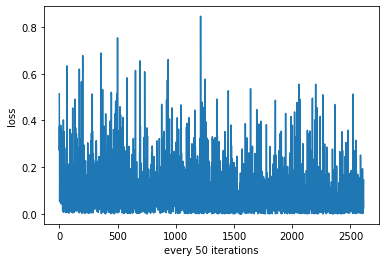

In [35]:
import matplotlib.pyplot as plt
plt.plot(train_loss_set)
plt.ylabel('loss')
plt.xlabel('every 50 iterations')
plt.show()

In [38]:
torch.cuda.empty_cache()

In [39]:
del train_dataloader

In [40]:
del train_data

In [41]:
del train_inputs

In [42]:
del train_masks

In [43]:
from sklearn.metrics import f1_score

In [49]:
total_labels=[]
total_predictions=[]
with torch.no_grad():
    correct = 0
    total = 0
    for i, batch in enumerate(validation_dataloader):
      batch = tuple(t.to(device) for t in batch)
      # Unpack the inputs from our dataloader
      b_input_ids, b_input_mask, b_labels = batch
      # Forward pass
      outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
      # print (outputs)
      print(i)
      prediction = torch.argmax(outputs[0],dim=1)
      total_labels.append(b_labels)
      total_predictions.append(prediction)
      total += b_labels.size(0)
      correct+=(prediction==b_labels).sum().item()

Streaming output truncated to the last 5000 lines.
11327
11328
11329
11330
11331
11332
11333
11334
11335
11336
11337
11338
11339
11340
11341
11342
11343
11344
11345
11346
11347
11348
11349
11350
11351
11352
11353
11354
11355
11356
11357
11358
11359
11360
11361
11362
11363
11364
11365
11366
11367
11368
11369
11370
11371
11372
11373
11374
11375
11376
11377
11378
11379
11380
11381
11382
11383
11384
11385
11386
11387
11388
11389
11390
11391
11392
11393
11394
11395
11396
11397
11398
11399
11400
11401
11402
11403
11404
11405
11406
11407
11408
11409
11410
11411
11412
11413
11414
11415
11416
11417
11418
11419
11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
1

In [50]:
print('Test Accuracy of the model on val data is: {} %'.format(100 * correct / total))

Test Accuracy of the model on val data is: 96.17188247679204 %


In [51]:
len(total_labels)==len(total_predictions)

True

In [52]:
total_labels=[x.tolist() for x in total_labels]
total_predictions=[x.tolist() for x in total_predictions]

In [53]:
total_labels=list(np.concatenate(total_labels).flat)

In [54]:
total_predictions=list(np.concatenate(total_predictions).flat)

In [55]:
f1_score(total_labels, total_predictions)

0.6933455995093529

Final bert score using entire training data